# Basic Model Training

### Setting up

**Notebook setup**. Select the "Edit" menu, then "Notebook settings". Choose "GPU" as the hardware accelerator. Check that "Omit code cell output..." is unchecked (so that the output is saved).



### Pytorch, dataset

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### Explore the data

In [4]:
print(training_data.data.size())
print(training_data.targets.size())
print(test_data.data.size())
print(test_data.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


Data of one image

In [5]:
first_image, first_label = training_data[0]
first_image = first_image.numpy().squeeze()
print(f"Shape of first image: {first_image.shape}")
print(first_image)

Shape of first image: (28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.

And this is what the image looks like (a shoe?)

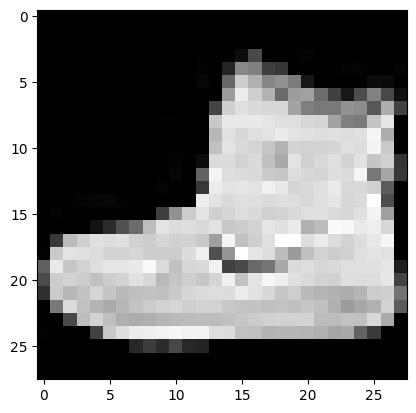

In [6]:
import matplotlib.pyplot as plt
plt.imshow(first_image, cmap='gray')

The label of the image (see the list of labels at https://github.com/zalandoresearch/fashion-mnist)

In [7]:
print(f"Label of first image: {first_label}")

Label of first image: 9


Put you code to create, train and test the model below

In [8]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [9]:
from torch import nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.cnn_stack(x)

model = CNN().to(device)

In [10]:
from torch.utils.data import DataLoader

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [11]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [12]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303889  [   64/60000]
loss: 1.785919  [ 6464/60000]
loss: 1.616687  [12864/60000]
loss: 1.778950  [19264/60000]
loss: 1.748519  [25664/60000]
loss: 1.658858  [32064/60000]
loss: 1.679977  [38464/60000]
loss: 1.617428  [44864/60000]
loss: 1.642206  [51264/60000]
loss: 1.644696  [57664/60000]
Epoch 2
-------------------------------
loss: 1.588386  [   64/60000]
loss: 1.639509  [ 6464/60000]
loss: 1.585485  [12864/60000]
loss: 1.658905  [19264/60000]
loss: 1.636741  [25664/60000]
loss: 1.668792  [32064/60000]
loss: 1.612468  [38464/60000]
loss: 1.641637  [44864/60000]
loss: 1.623976  [51264/60000]
loss: 1.631420  [57664/60000]
Epoch 3
-------------------------------
loss: 1.541722  [   64/60000]
loss: 1.633116  [ 6464/60000]
loss: 1.535841  [12864/60000]
loss: 1.620762  [19264/60000]
loss: 1.576736  [25664/60000]
loss: 1.646479  [32064/60000]
loss: 1.569480  [38464/60000]
loss: 1.610365  [44864/60000]
loss: 1.572989  [51264/60000]
loss: 1.61

In [13]:
model.eval()

all_outputs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs.to(device))
        all_outputs.append(outputs)
        all_labels.append(labels)

all_outputs = torch.cat(all_outputs, dim=0)
all_labels = torch.cat(all_labels, dim=0)

In [14]:
print(all_outputs[0])
print(torch.sum(all_outputs[0]))

tensor([1.8849e-27, 4.9017e-32, 1.8011e-33, 7.1197e-31, 2.6961e-42, 4.3520e-27,
        4.1512e-27, 2.1204e-28, 6.1837e-28, 1.0000e+00], device='cuda:0')
tensor(1., device='cuda:0')


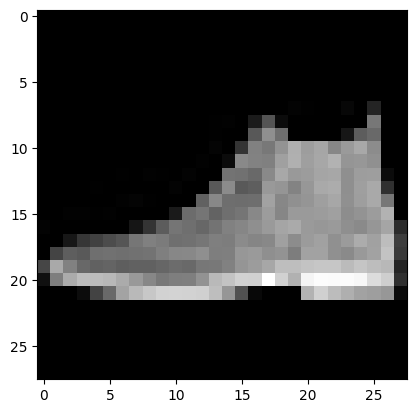

In [15]:
first_image, _ = test_data[0]
first_image = first_image.numpy().squeeze()
plt.imshow(first_image, cmap='gray')

In [16]:
print(torch.argmax(all_outputs[0]))
print(all_labels[0])

tensor(9, device='cuda:0')
tensor(9)


In [17]:
all_preds = torch.argmax(all_outputs, dim=1)
correct = torch.sum(all_preds.cpu() == all_labels)
print("Correct classes: {} of {} (accuracy: {})".format(correct, 10000, correct/10000))

Correct classes: 9044 of 10000 (accuracy: 0.9043999910354614)
